No fim de 2019, o Novo Coronavírus foi nomeado como SARS-CoV-2. Este virus produz  a  doença  classificada  como  COVID-19,  sendo  agente  causador  de  uma  série  de  casos  de pneumonia. O  vírus tem alta transmissibilidade e provoca uma síndrome respiratória aguda que varia de casos leves – cerca de 80% – a casos muito graves com insuficiência respiratória –entre 5% e 10% dos casos. O primeiro caso registrado no brasil ocorreu em 26/02/2020, em SP, em exame realizado no Hospital Israelita Albert Einstein.

In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

In [2]:
#Carregando dados
data = pd.read_excel('dataset.xlsx')

In [3]:
#Verificando as 5 primeiras linhas
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Retirando coluna ID
data.drop(columns = ('Patient ID'), axis = 1, inplace = True)

In [5]:
#Verificando quantidade de valores NaN
for i in data.columns:
    x= data[i].isna().sum()
    print(i , x)

Patient age quantile 0
SARS-Cov-2 exam result 0
Patient addmited to regular ward (1=yes, 0=no) 0
Patient addmited to semi-intensive unit (1=yes, 0=no) 0
Patient addmited to intensive care unit (1=yes, 0=no) 0
Hematocrit 5041
Hemoglobin 5041
Platelets 5042
Mean platelet volume  5045
Red blood Cells 5042
Lymphocytes 5042
Mean corpuscular hemoglobin concentration (MCHC) 5042
Leukocytes 5042
Basophils 5042
Mean corpuscular hemoglobin (MCH) 5042
Eosinophils 5042
Mean corpuscular volume (MCV) 5042
Monocytes 5043
Red blood cell distribution width (RDW) 5042
Serum Glucose 5436
Respiratory Syncytial Virus 4290
Influenza A 4290
Influenza B 4290
Parainfluenza 1 4292
CoronavirusNL63 4292
Rhinovirus/Enterovirus 4292
Mycoplasma pneumoniae 5644
Coronavirus HKU1 4292
Parainfluenza 3 4292
Chlamydophila pneumoniae 4292
Adenovirus 4292
Parainfluenza 4 4292
Coronavirus229E 4292
CoronavirusOC43 4292
Inf A H1N1 2009 4292
Bordetella pertussis 4292
Metapneumovirus 4292
Parainfluenza 2 4292
Neutrophils 5131
Ur

In [6]:
#Verificar e retirar os valores sem informações
for i in data.columns:
    x= data[i].isna().sum()
    if x == 5644:
        print(i , x)

Mycoplasma pneumoniae 5644
Urine - Sugar 5644
Partial thromboplastin time (PTT)  5644
Prothrombin time (PT), Activity 5644
D-Dimer 5644


In [7]:
#Deletando as colunas que não possuem informações úteis para nós
data.drop(columns = [('Mycoplasma pneumoniae'),('Urine - Sugar'),('D-Dimer'),('Prothrombin time (PT), Activity')], axis = 1, inplace = True)


In [8]:
# Segundo menor dados faltantes
for i in data.columns:
    x= data[i].isna().sum()
    if x == 4292:
        print(i , x)

Parainfluenza 1 4292
CoronavirusNL63 4292
Rhinovirus/Enterovirus 4292
Coronavirus HKU1 4292
Parainfluenza 3 4292
Chlamydophila pneumoniae 4292
Adenovirus 4292
Parainfluenza 4 4292
Coronavirus229E 4292
CoronavirusOC43 4292
Inf A H1N1 2009 4292
Bordetella pertussis 4292
Metapneumovirus 4292
Parainfluenza 2 4292


In [9]:
#Menos dados faltantes
for i in data.columns:
    x= data[i].isna().sum()
    if x == 4290:
        print(i , x)

Respiratory Syncytial Virus 4290
Influenza A 4290
Influenza B 4290


In [10]:
for i in data.columns:
    x= data[i].isna().sum()
    if x == 5041:
        print(i , x)

Hematocrit 5041
Hemoglobin 5041


In [11]:
for i in data.columns:
    x= data[i].isna().sum()
    if x == 5042:
        print(i , x)

Platelets 5042
Red blood Cells 5042
Lymphocytes 5042
Mean corpuscular hemoglobin concentration (MCHC) 5042
Leukocytes 5042
Basophils 5042
Mean corpuscular hemoglobin (MCH) 5042
Eosinophils 5042
Mean corpuscular volume (MCV) 5042
Red blood cell distribution width (RDW) 5042


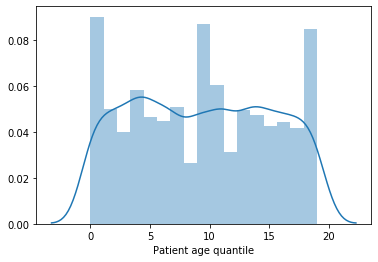

In [12]:
#Verificando a variavel age
sns.distplot(data['Patient age quantile'])

In [13]:
# Extraindo variáveis do tipo categóricas
dfcatname = data.dtypes[data.dtypes == 'object'].index
dfcatname

Index(['SARS-Cov-2 exam result', 'Respiratory Syncytial Virus', 'Influenza A',
       'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63',
       'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3',
       'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4',
       'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009',
       'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2',
       'Influenza B, rapid test', 'Influenza A, rapid test', 'Strepto A',
       'Urine - Esterase', 'Urine - Aspect', 'Urine - pH',
       'Urine - Hemoglobin', 'Urine - Bile pigments', 'Urine - Ketone Bodies',
       'Urine - Nitrite', 'Urine - Urobilinogen', 'Urine - Protein',
       'Urine - Leukocytes', 'Urine - Crystals', 'Urine - Hyaline cylinders',
       'Urine - Granular cylinders', 'Urine - Yeasts', 'Urine - Color'],
      dtype='object')

In [14]:
data[dfcatname].head()

,SARS-Cov-2 exam result,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,...,Urine - Ketone Bodies,Urine - Nitrite,Urine - Urobilinogen,Urine - Protein,Urine - Leukocytes,Urine - Crystals,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color
0,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,negative,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,negative,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data[dfcatname].describe()

,SARS-Cov-2 exam result,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,...,Urine - Ketone Bodies,Urine - Nitrite,Urine - Urobilinogen,Urine - Protein,Urine - Leukocytes,Urine - Crystals,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color
count,5644,1354,1354,1354,1352,1352,1352,1352,1352,1352,...,57,1,69,60,70,70,67,69,70,70
unique,2,2,2,2,2,2,2,2,2,2,...,2,1,2,2,31,5,1,1,1,4
top,negative,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,...,absent,not_done,normal,absent,3000,Ausentes,absent,absent,absent,yellow
freq,5086,1302,1336,1277,1349,1307,973,1332,1342,1343,...,56,1,68,59,9,65,67,69,70,55


In [16]:
non_num_cols = data.select_dtypes(['object']).columns
non_num_cols

for name in non_num_cols:
    data[name] = data[name].astype('category')

data[non_num_cols] = data[non_num_cols].apply(lambda x: x.cat.codes)

In [17]:
X = data.drop(columns = ('SARS-Cov-2 exam result'))
Y = data['SARS-Cov-2 exam result']

In [18]:
X.shape,Y.shape

((5644, 105), (5644,))

In [19]:
# DataFrame com dados com maior quantidade de informações
data2 = pd.DataFrame(data, columns = ['Patient age quantile', 'Parainfluenza','CoronavirusNL63','Rhinovirus/Enterovirus','Coronavirus HKU1','Chlamydophila pneumoniae','Adenovirus','Coronavirus229E','CoronavirusOC43','Inf A H1N1','Bordetella pertussis','Metapneumovirus','Respiratory Syncytial Virus','Influenza A','Influenza B','Hematocrit','Hemoglobin','Platelets','Red blood Cells', 'Lymphocytes','Mean corpuscular hemoglobin concentration (MCHC)','Leukocytes','Basophils','Mean corpuscular hemoglobin (MCH)', 
'Eosinophils','Mean corpuscular volume (MCV)','Red blood cell distribution width (RDW)', 'SARS-Cov-2 exam result','Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)'])

In [20]:
data2.head()

,Patient age quantile,Parainfluenza,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Chlamydophila pneumoniae,Adenovirus,Coronavirus229E,CoronavirusOC43,Inf A H1N1,...,Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Red blood cell distribution width (RDW),SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,13,NaN,-1,-1,-1,-1,-1,-1,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1,17,NaN,1,0,1,1,1,1,1,NaN,...,-0.09461,-0.223767,-0.292269,1.482158,0.166192,-0.625073,0,0,0,0
2,8,NaN,-1,-1,-1,-1,-1,-1,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
3,5,NaN,-1,-1,-1,-1,-1,-1,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,15,NaN,1,0,1,1,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [21]:
data2.fillna('NaoRealizado', inplace = True)

In [22]:
# Extraindo variáveis do tipo categóricas
dfcatname = data2.dtypes[data2.dtypes == 'object'].index
dfcatname

Index(['Parainfluenza', 'Inf A H1N1', 'Hematocrit', 'Hemoglobin', 'Platelets',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [23]:
non_num_cols = data2.select_dtypes(['object']).columns
non_num_cols

for name in non_num_cols:
    data2[name] = data2[name].astype('category')

data2[non_num_cols] = data2[non_num_cols].apply(lambda x: x.cat.codes)

In [24]:
data2.drop(columns = [('Mean corpuscular hemoglobin concentration (MCHC)'), ('Parainfluenza'),('Inf A H1N1')], axis = 1, inplace = True)

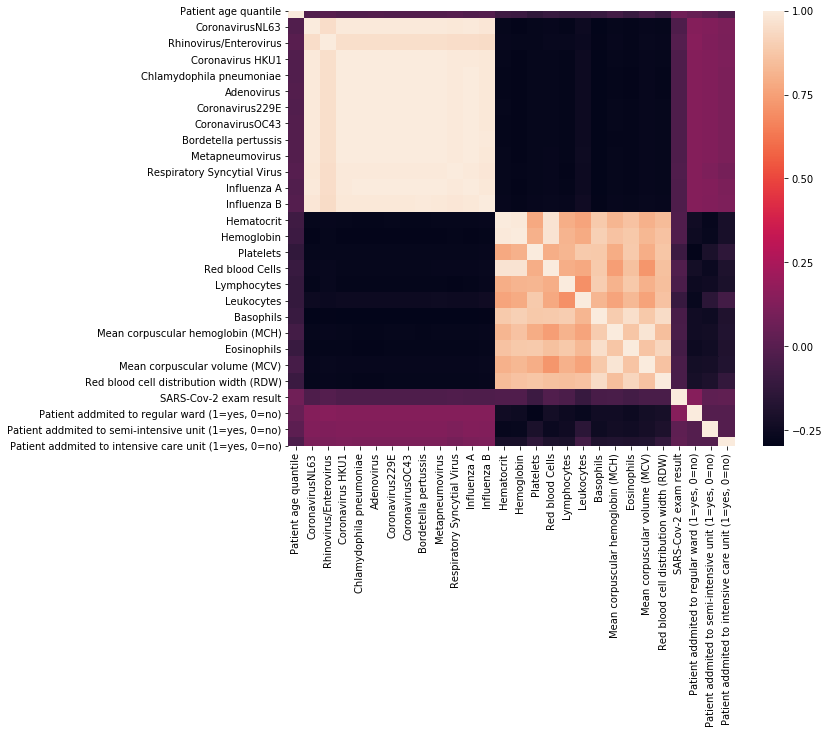

In [25]:
plt.figure(figsize= (10,8))
corr = data2.corr()
sns.heatmap(corr)

Verificando as variáveis com maior importância na predição da doença. Percebemos que a idade possui uma peso grande, como era o esperado, seguida de leucócitos e plaquetas.

Task2

In [26]:
X2 = data2


In [27]:
X2["Patient addmited to intensive care unit (1=yes, 0=no)"].astype('object')
X2["Patient addmited to semi-intensive unit (1=yes, 0=no)"].astype('object')
X2["Patient addmited to regular ward (1=yes, 0=no)"].astype('object')


0       0
1       0
2       0
3       0
4       0
       ..
5639    0
5640    0
5641    0
5642    0
5643    0
Name: Patient addmited to regular ward (1=yes, 0=no), Length: 5644, dtype: object

In [28]:
X2["Patient addmited to regular ward (1=yes, 0=no)"].replace(to_replace=[1],
    value='Regular_Ward',
    inplace=True
)

In [29]:
X2["Patient addmited to semi-intensive unit (1=yes, 0=no)"].replace(to_replace=[1],
    value='Semi-Intensive',
    inplace=True
)

In [30]:
X2["Patient addmited to intensive care unit (1=yes, 0=no)"].replace(to_replace=[1],
    value='Intensive',
    inplace=True
)

In [31]:
X2.head()

,Patient age quantile,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Chlamydophila pneumoniae,Adenovirus,Coronavirus229E,CoronavirusOC43,Bordetella pertussis,Metapneumovirus,...,Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Red blood cell distribution width (RDW),SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,13,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,475,17,91,86,190,61,0,0,0,0
1,17,1,0,1,1,1,1,1,1,1,...,240,3,47,54,107,11,0,0,0,0
2,8,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,475,17,91,86,190,61,0,0,0,0
3,5,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,475,17,91,86,190,61,0,0,0,0
4,15,1,0,1,1,1,1,1,1,1,...,475,17,91,86,190,61,0,0,0,0


In [32]:
df1 = X2[X2["Patient addmited to regular ward (1=yes, 0=no)"] == 'Regular_Ward']
df2 = X2[X2["Patient addmited to intensive care unit (1=yes, 0=no)"] == 'Intensive']
df3 = X2[X2["Patient addmited to semi-intensive unit (1=yes, 0=no)"] == 'Semi-Intensive']

In [33]:
df1.drop(columns = [('Patient addmited to intensive care unit (1=yes, 0=no)'),('Patient addmited to semi-intensive unit (1=yes, 0=no)')], axis = 1, inplace = True)

/home/jfs/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
df2.drop(columns = [('Patient addmited to regular ward (1=yes, 0=no)'),('Patient addmited to semi-intensive unit (1=yes, 0=no)')], axis = 1, inplace = True)

In [35]:
df3.drop(columns = [('Patient addmited to regular ward (1=yes, 0=no)'),('Patient addmited to intensive care unit (1=yes, 0=no)')], axis = 1, inplace = True)

In [36]:
df1.shape, df2.shape, df3.shape

((79, 26), (41, 26), (50, 26))

In [37]:
df1.rename(columns = {"Patient addmited to regular ward (1=yes, 0=no)": 'Admissão'},inplace=True)
df2.rename(columns = {"Patient addmited to intensive care unit (1=yes, 0=no)": 'Admissão'},inplace=True)
df3.rename(columns = {"Patient addmited to semi-intensive unit (1=yes, 0=no)": 'Admissão'},inplace=True)


/home/jfs/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [38]:
frames = [df1,df2,df3]


In [39]:
df_final = pd.concat(frames, sort = True)

In [40]:
df_final['Admissão'] = df_final['Admissão'].astype('object')

In [41]:
non_num_cols = df_final.select_dtypes(['object']).columns
non_num_cols

for name in non_num_cols:
    df_final[name] = df_final[name].astype('category')

df_final[non_num_cols] = df_final[non_num_cols].apply(lambda x: x.cat.codes)

In [42]:
df_final.dtypes

Adenovirus                                  int8
Admissão                                    int8
Basophils                                   int8
Bordetella pertussis                        int8
Chlamydophila pneumoniae                    int8
Coronavirus HKU1                            int8
Coronavirus229E                             int8
CoronavirusNL63                             int8
CoronavirusOC43                             int8
Eosinophils                                 int8
Hematocrit                                 int16
Hemoglobin                                  int8
Influenza A                                 int8
Influenza B                                 int8
Leukocytes                                 int16
Lymphocytes                                int16
Mean corpuscular hemoglobin (MCH)           int8
Mean corpuscular volume (MCV)              int16
Metapneumovirus                             int8
Patient age quantile                       int64
Platelets           

In [43]:
X3 = df_final.drop(columns = ('Admissão'))
Y3 = df_final['Admissão']

In [44]:
X3.shape

(170, 25)

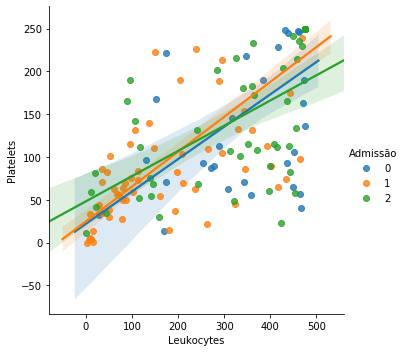

In [45]:
# Usando mais de 2 variáveis
sns.lmplot(x = "Leukocytes", y = "Platelets", hue = "Admissão", data = df_final);


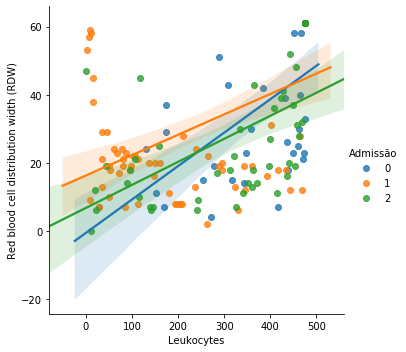

In [46]:
# Usando mais de 2 variáveis
sns.lmplot(x = "Leukocytes", y = "Red blood cell distribution width (RDW)", hue = "Admissão", data = df_final);

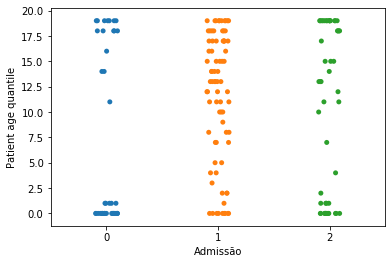

In [47]:
# stripplot
sns.stripplot(x = "Admissão", y = "Patient age quantile", data = df_final, jitter = True);

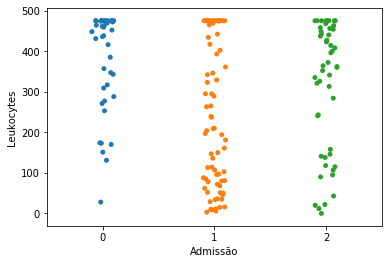

In [48]:
sns.stripplot(x = "Admissão", y = "Leukocytes", data = df_final, jitter = True);

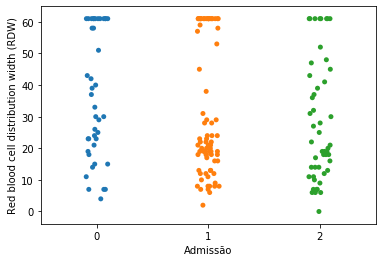

In [49]:
sns.stripplot(x = "Admissão", y = "Red blood cell distribution width (RDW)", data = df_final, jitter = True);

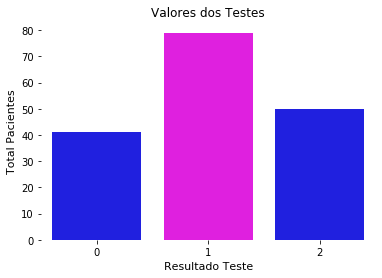

In [50]:
#Verificando o balanceamento
sns.countplot(Y3, palette = ['#0000FF', '#FF00FF'])
plt.box(False)
plt.xlabel('Resultado Teste', fontsize = 11)
plt.ylabel('Total Pacientes', fontsize = 11)
plt.title('Valores dos Testes')
plt.show()

In [51]:
from imblearn.over_sampling import SMOTE
# create smote object
smt = SMOTE(k_neighbors=5, random_state=104)

# Do the process
x_s, y_s = smt.fit_sample(X3, Y3)

Using TensorFlow backend.


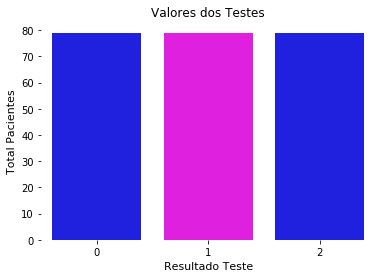

In [52]:
#Verificando o balanceamento
sns.countplot(y_s, palette = ['#0000FF', '#FF00FF'])
plt.box(False)
plt.xlabel('Resultado Teste', fontsize = 11)
plt.ylabel('Total Pacientes', fontsize = 11)
plt.title('Valores dos Testes')
plt.show()

In [53]:
#Separando dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x_s,
    y_s,
    test_size=0.2,
    random_state=42
)

In [54]:
# Verificando a importância dos Atributos com o Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier


# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier()
modelo.fit(X3, Y3)


# Print dos Resultados
print(X3.columns)
print(modelo.feature_importances_)

Index(['Adenovirus', 'Basophils', 'Bordetella pertussis',
       'Chlamydophila pneumoniae', 'Coronavirus HKU1', 'Coronavirus229E',
       'CoronavirusNL63', 'CoronavirusOC43', 'Eosinophils', 'Hematocrit',
       'Hemoglobin', 'Influenza A', 'Influenza B', 'Leukocytes', 'Lymphocytes',
       'Mean corpuscular hemoglobin (MCH)', 'Mean corpuscular volume (MCV)',
       'Metapneumovirus', 'Patient age quantile', 'Platelets',
       'Red blood Cells', 'Red blood cell distribution width (RDW)',
       'Respiratory Syncytial Virus', 'Rhinovirus/Enterovirus',
       'SARS-Cov-2 exam result'],
      dtype='object')
[0.0155267  0.06831963 0.00534908 0.00539191 0.01441895 0.00525325
 0.00920863 0.00388927 0.06210443 0.05961379 0.0666144  0.00375612
 0.00951995 0.0832571  0.07230047 0.06429852 0.06023023 0.00484828
 0.0933752  0.06844992 0.05780331 0.07037343 0.02050242 0.0261452
 0.04944979]


In [55]:
feature_imp = pd.Series(modelo.feature_importances_,index=X3.columns).sort_values(ascending=False)

In [56]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index )

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

Verificando os pesos das variáveis.Podemos observar que além da idade, temos importância considerável nas variáveis leucócitos, distribuição de células vermelhas e hemoglobina.

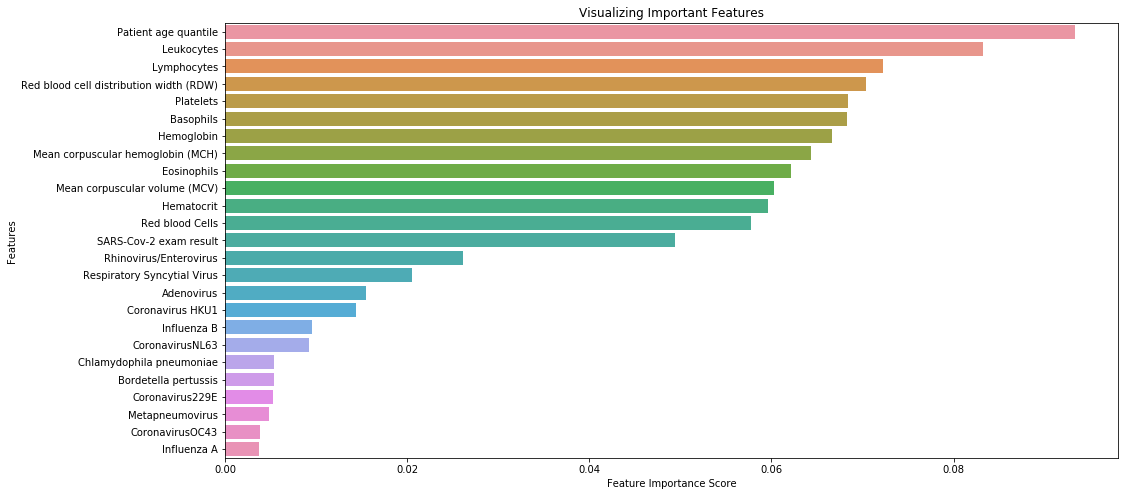

In [57]:
#Verificando os pesos de cada variável na predição
plt.figure(figsize= (10,8))
visualiza_features_importantes(feature_imp)

In [58]:
feature_imp

Patient age quantile                       0.093375
Leukocytes                                 0.083257
Lymphocytes                                0.072300
Red blood cell distribution width (RDW)    0.070373
Platelets                                  0.068450
Basophils                                  0.068320
Hemoglobin                                 0.066614
Mean corpuscular hemoglobin (MCH)          0.064299
Eosinophils                                0.062104
Mean corpuscular volume (MCV)              0.060230
Hematocrit                                 0.059614
Red blood Cells                            0.057803
SARS-Cov-2 exam result                     0.049450
Rhinovirus/Enterovirus                     0.026145
Respiratory Syncytial Virus                0.020502
Adenovirus                                 0.015527
Coronavirus HKU1                           0.014419
Influenza B                                0.009520
CoronavirusNL63                            0.009209
Chlamydophil

In [59]:
#Limitando as variáveis para observar o comportamento.
features_selecionadas = []
for feature,importancia in feature_imp.iteritems():
    if   importancia > 0.06 :
        print("{}:\t{}".format(feature, importancia))
        features_selecionadas.append(feature)

Patient age quantile:	0.09337520084161548
Leukocytes:	0.08325709640170131
Lymphocytes:	0.07230047137286892
Red blood cell distribution width (RDW):	0.07037342993270503
Platelets:	0.06844991842231993
Basophils:	0.06831963363594766
Hemoglobin:	0.06661439657475439
Mean corpuscular hemoglobin (MCH):	0.06429851999768095
Eosinophils:	0.06210443079443579
Mean corpuscular volume (MCV):	0.060230228918113346


In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    x_s[features_selecionadas],
    y_s,
    test_size=0.2,
    random_state=0
)

In [61]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(criterion = 'gini',
 max_depth= 20,
 min_samples_leaf= 10,
 min_samples_split= 15,
 n_estimators= 150,
random_state=0)
random_clf.fit(X_train,y_train)
resultado = random_clf.predict(X_test)
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59        19
           1       0.53      0.71      0.61        14
           2       0.21      0.20      0.21        15

    accuracy                           0.48        48
   macro avg       0.47      0.48      0.47        48
weighted avg       0.48      0.48      0.47        48



/home/jfs/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


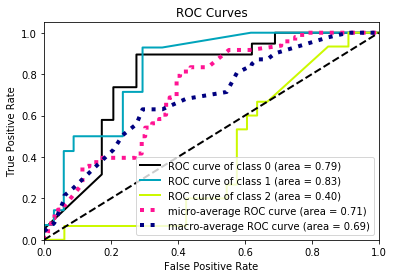

In [62]:
# Calcula a Curva ROC para cada classe
import scikitplot as skplt
from sklearn.metrics import confusion_matrix, roc_auc_score
y_probs_v1 = random_clf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probs_v1)
plt.show()

In [63]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier



# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 30

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = AdaBoostClassifier(n_estimators = num_trees, random_state = seed)

# Cross Validation
resultado = cross_val_score(modelo, x_s, y_s, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 51.830


In [64]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

modelo_xg = xgb.XGBClassifier(learning_rate = 0.01, 
                              max_depth = 2, 
                              n_estimators = 800,
                             min_child_weight = 5,
                             gamma = 0.1,
                             reg_alpha=1,
                            reg_lambda=1.5)
modelo_xg.fit(X_train,y_train)    
resultado2 = modelo_xg.predict_proba(X_test)[:,1]
valores_previstos2 = modelo_xg.predict(X_test)
print(metrics.classification_report(y_test,valores_previstos2))

              precision    recall  f1-score   support

           0       0.60      0.63      0.62        19
           1       0.50      0.50      0.50        14
           2       0.21      0.20      0.21        15

    accuracy                           0.46        48
   macro avg       0.44      0.44      0.44        48
weighted avg       0.45      0.46      0.45        48



In [65]:
from sklearn.neighbors import KNeighborsClassifier

# Criando o objeto de classificação KNeighbors  
KNN = KNeighborsClassifier(n_neighbors = 14) # Valor default é 5

# Treinando o modelo com dados de treino 
KNN.fit(X_train, y_train)

# Previsões
valores_previstos = KNN.predict(X_test)

#Verificando as métricas
from sklearn import metrics
print(metrics.classification_report(y_test,valores_previstos, ))

              precision    recall  f1-score   support

           0       0.62      0.42      0.50        19
           1       0.64      0.64      0.64        14
           2       0.33      0.47      0.39        15

    accuracy                           0.50        48
   macro avg       0.53      0.51      0.51        48
weighted avg       0.54      0.50      0.51        48



/home/jfs/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


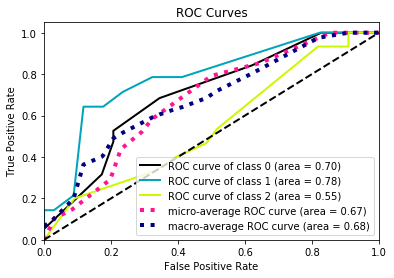

In [66]:
# Calcula a Curva ROC para cada classe
import scikitplot as skplt
from sklearn.metrics import confusion_matrix, roc_auc_score
y_probs_v1 = KNN.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probs_v1)
plt.show()